In [9]:
#(a)
import numpy as np
import pandas as pd
def step_size(t,nt):
    T = t
    NT = nt
    sigma = 0.3
    r = 0.05
    dt = T/NT
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    return u,d,p

a = [step_size(2,24),step_size(2,104),step_size(2,504)]
ans1 = pd.DataFrame(a, index = ['Δt = 1/12','Δt = 1/52','Δt = 1/252'],columns = ['u', 'd', 'p'])
ans1



,u,d,p
Δt = 1/12,1.090463,0.917042,0.502439
Δt = 1/52,1.042480,0.959251,0.501159
Δt = 1/252,1.019078,0.981279,0.500525


In [10]:
#(b)
import math
S0  = 50
sigma = 0.3
K = 52
r = 0.05
T = 2
def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))
    
def binomial_EU(S0, K , T, r, sigma, NT, type_ = 'put'):
    dt = T/NT
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    value = 0 
    for i in range(NT+1):
        node_prob = combos(NT, i)*p**i*(1-p)**(NT-i)
        ST = S0*(u)**i*(d)**(NT-i)
        if type_ == 'call':
            value += max(ST-K,0) * node_prob
        elif type_ == 'put':
            value += max(K-ST, 0) * node_prob
        else:
            raise ValueError("type_ must be 'call' or 'put'" )
    return value*np.exp(-r*T)

b = [binomial_EU(S0, K , T, r, sigma, 24, type_ = 'put'),binomial_EU(S0, K , T, r, sigma, 104, type_ = 'put'),binomial_EU(S0, K , T, r, sigma, 504, type_ = 'put')]
ans2 = pd.DataFrame(b, index = ['Δt = 1/12','Δt = 1/52','Δt = 1/252'],columns = ['European Put'])
ans2


,European Put
Δt = 1/12,6.787399
Δt = 1/52,6.777474
Δt = 1/252,6.757001


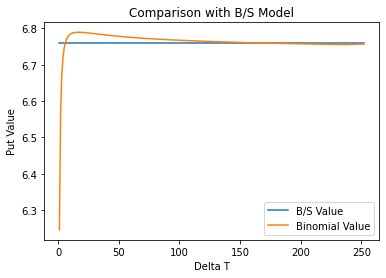

In [11]:
#(c)
import matplotlib.pyplot as plt
BT = []
BS = []
for i in range(1,253,1):
    BT.append(binomial_EU(S0, K , 2, r, sigma, i*2, type_ = 'put'))
for i in range(1,253,1):
    BS.append(6.7601)
x = np.arange(1,253)
y1 = BS
y2 = BT
plt.plot(x, y1, x, y2)
plt.title("Comparison with B/S Model")
plt.xlabel("Delta T")
plt.ylabel("Put Value")
plt.gca().legend(('B/S Value','Binomial Value'))
plt.show() 

In [12]:
#(d)
import math
S0  = 50
sigma = 0.3
K = 52
r = 0.05
T = 2
    
def binomial_American(S0, K , T, r, sigma, NT, type_ = 'put'):
    dt = T/NT
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    disc = np.exp(-r*dt)
    
    # initialise stock prices at maturity
    S = np.zeros(NT+1)
    for j in range(0, NT+1):
        S[j] = S0 * u**j * d**(NT -j)
        
    # option payoff 
    C = np.zeros(NT+1)
    for j in range(0, NT+1):
        if type_ == 'put':
            C[j] = max(0, K - S[j])
        else:
            C[j] = max(0, S[j] - K)
    
    # backward recursion through the tree
    for i in np.arange(NT-1,-1,-1):
        for j in range(0,i+1):
            S = S0 * u**j * d**(i-j)
            C[j] = disc * ( p*C[j+1] + (1-p)*C[j] )
            if type_ == 'put':
                C[j] = max(C[j], K - S)
            else:
                C[j] = max(C[j], S - K)    
    
    return C[0]


b = [binomial_American(S0, K , T, r, sigma, 24, type_ = 'put'),binomial_American(S0, K , T, r, sigma, 104, type_ = 'put'),binomial_American(S0, K , T, r, sigma, 504, type_ = 'put')]
ans3 = pd.DataFrame(b, index = ['Δt = 1/12','Δt = 1/52','Δt = 1/252'],columns = ['American Put'])
ans3

,American Put
Δt = 1/12,7.507540
Δt = 1/52,7.485586
Δt = 1/252,7.471032


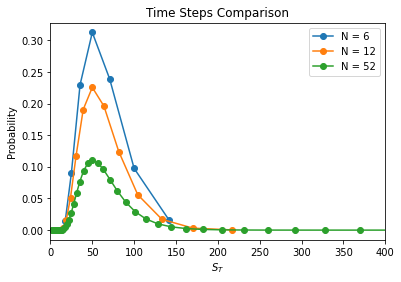

In [13]:
def Distribution(NT):
    S0 = 50
    sigma = 0.3
    K = 52
    r = 0.05
    T = 2
    dt = T/NT
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    np.random.seed(0)

    ST = np.zeros(NT+1)
    Prob = np.zeros(NT+1)

    for j in range(0,NT+1):
        ST[j]= S0*(u)**j*(d)**(NT-j)
        Prob[j]=(math.comb(NT,j))*(p**j)*((1-p)**(NT-j))
    plt.title("Time Steps Comparison")
    plt.plot(ST,Prob,'-o')
    plt.xlabel("$S_T$")
    plt.ylabel("Probability")
    plt.xlim(0,400)

Distribution(6)
Distribution(12)
Distribution(52)
plt.gca().legend(('N = 6','N = 12','N = 52'))

In [14]:
Final = ans1.copy()
Final['European Put'] = ans2['European Put']
Final['American Put'] = ans3['American Put']
Final

,u,d,p,European Put,American Put
Δt = 1/12,1.090463,0.917042,0.502439,6.787399,7.507540
Δt = 1/52,1.042480,0.959251,0.501159,6.777474,7.485586
Δt = 1/252,1.019078,0.981279,0.500525,6.757001,7.471032
